In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('SeaPlaneTravel.csv')

In [3]:
data.head()

,Month,#Passengers
0,2004-01,112
1,2004-02,118
2,2004-03,132
3,2004-04,129
4,2004-05,121


In [6]:
data.rename(columns={'#Passengers': 'Count'}, inplace=True)

In [9]:
data = data.set_index('Month')

In [10]:
data.index = pd.to_datetime(data.index, infer_datetime_format=True)

In [11]:
data.head()

,Count
Month,
2004-01-01,112
2004-02-01,118
2004-03-01,132
2004-04-01,129
2004-05-01,121


In [19]:
data = data.resample('M').mean()

In [20]:
data.index

DatetimeIndex(['2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30',
               '2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31',
               '2004-09-30', '2004-10-31',
               ...
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Month', length=144, freq='M')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set()

## Checking for Stationary

Text(0, 0.5, 'Count of Passengers')

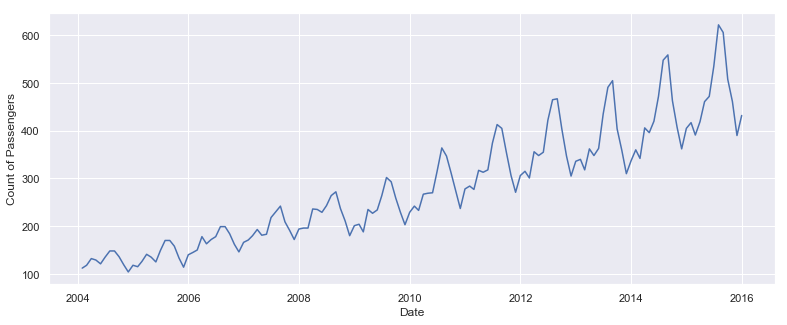

In [22]:
plt.figure(figsize=(13, 5))
plt.plot(data.Count)
plt.xlabel('Date')
plt.ylabel('Count of Passengers')

## Observations - 
Data is not sationary, convert it to stationary data by differencing.

In [30]:
differenced_data = data.Count - data.Count.shift()
differenced_data.head()

Month
2004-01-31     NaN
2004-02-29     6.0
2004-03-31    14.0
2004-04-30    -3.0
2004-05-31    -8.0
Freq: M, Name: Count, dtype: float64

Text(0, 0.5, 'Count of Passengers')

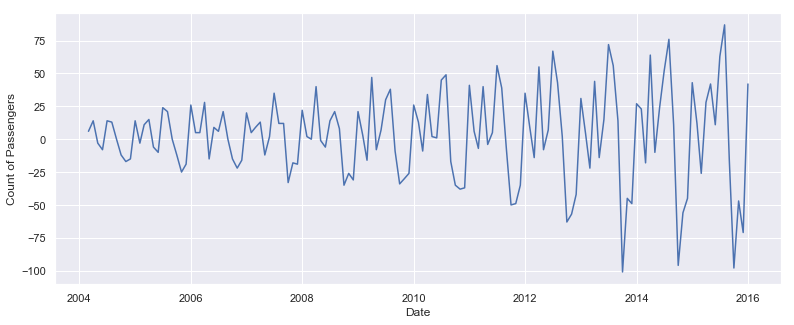

In [31]:
plt.figure(figsize=(13, 5))
plt.plot(differenced_data)
plt.xlabel('Date')
plt.ylabel('Count of Passengers')

## Checking the value for ACF, PACF graph

In [32]:
from statsmodels.tsa.stattools import acf, pacf

In [34]:
differenced_data.dropna(inplace=True)

In [35]:
lag_acf = pd.Series(acf(differenced_data, nlags=10))
lag_pacf = pd.Series(pacf(differenced_data, nlags=10, method='ols'))

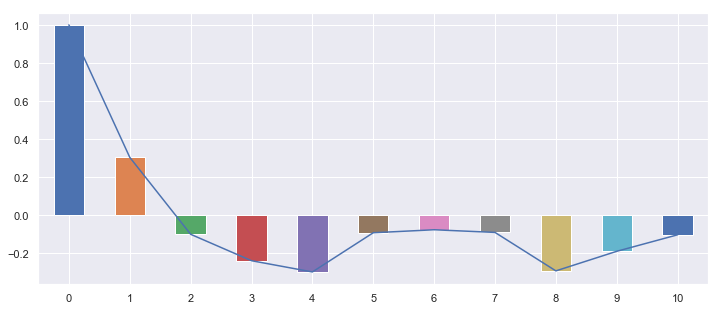

In [36]:
plt.figure(figsize=(12, 5))
lag_acf.plot.bar()
lag_acf.plot()

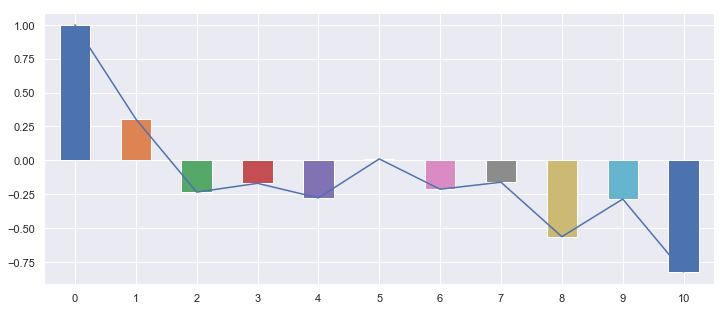

In [37]:
plt.figure(figsize=(12, 5))
lag_pacf.plot.bar()
lag_pacf.plot()

## Observations - 
1. Differencing (d) - 1
2. AR (p) - 2
3. MA (q) - 2

## Performing ARIMA Forecast

In [73]:
history = []

In [74]:
from statsmodels.tsa.arima_model import ARIMA

In [75]:
size = int(len(data.Count) * 0.66)
train, test = data.Count[0:size], data.Count[size:len(data.Count)]
history = [x for x in train]
predictions = list()

In [76]:
train.head()

Month
2004-01-31    112
2004-02-29    118
2004-03-31    132
2004-04-30    129
2004-05-31    121
Freq: M, Name: Count, dtype: int64

In [77]:
test.head()

Month
2011-12-31    306
2012-01-31    315
2012-02-29    301
2012-03-31    356
2012-04-30    348
Freq: M, Name: Count, dtype: int64

In [78]:
history[:5]

[112, 118, 132, 129, 121]

In [79]:
import warnings

In [80]:
warnings.filterwarnings('ignore')

In [81]:
for t in range(len(test)):
#     if (t==7):
#         break
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))

## Visualize the forecast and observed values

In [82]:
observed_values = pd.Series(history, index=data.index)

In [83]:
observed_values.head()

Month
2004-01-31    112
2004-02-29    118
2004-03-31    132
2004-04-30    129
2004-05-31    121
Freq: M, dtype: int64

In [84]:
prediction_values = pd.Series(predictions, index=test.index)

In [85]:
prediction_values.head()

Month
2011-12-31    273.192404
2012-01-31    323.302617
2012-02-29    343.636772
2012-03-31    312.742942
2012-04-30    369.700916
Freq: M, dtype: float64

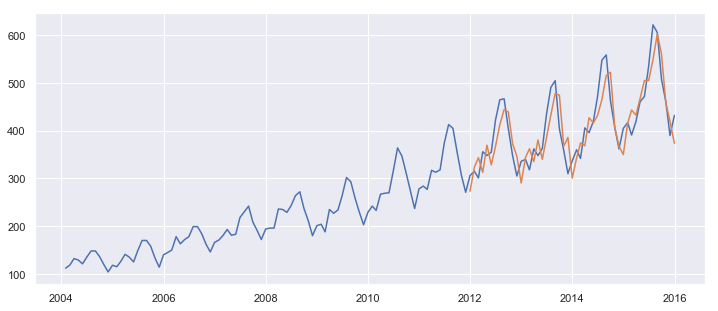

In [87]:
plt.figure(figsize=(12, 5))
plt.plot(observed_values)
plt.plot(prediction_values)

## Checking Errors

In [93]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [94]:
error = sqrt(mean_squared_error(test, predictions))
error

40.12639598022475